In [1]:
#import lib and docs

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart_v2.csv')

In [3]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
df.shape

(270, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [6]:
X = df.drop('heart disease', axis = 1)

y = df['heart disease']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=42)

Fit the decision tree with default hyperparameters, apart from which max_depth = 3 so that we can plot and read the tree. 

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [10]:
# !pip install six

In [11]:
# importing packaging for visualisation

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

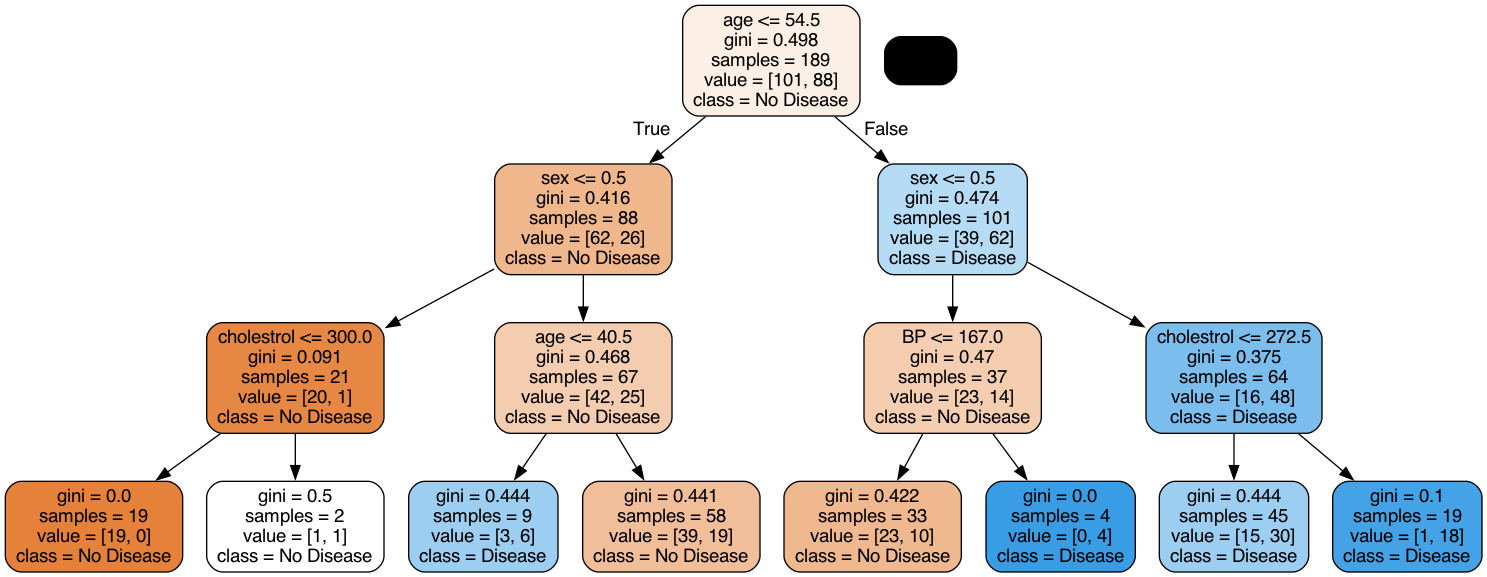

In [12]:
#plotting the tree with max_depth = 3
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', 'Disease'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

### Evaluating the model performance

In [13]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
print(accuracy_score(y_train, y_pred_train))
confusion_matrix(y_train, y_pred_train)

0.7407407407407407


array([[82, 19],
       [30, 58]])

In [16]:
print(accuracy_score(y_test, y_pred_test))
confusion_matrix(y_test, y_pred_test)

0.6049382716049383


array([[35, 14],
       [18, 14]])

#### Create the helper functions to evaluate the model and plot the graph

In [17]:
def get_dt_graph(dt_classifer):
    dot_data = StringIO()

    export_graphviz(dt_classifer, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', 'Disease'])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    return graph

In [18]:
def evaluate_model(dt_classifier):
    y_pred_train = dt_classifier.predict(X_train)
    y_pred_test = dt_classifier.predict(X_test)

    print("Train set performance")
    print("Accuracy: ", accuracy_score(y_train, y_pred_train))
    print("Confusion matrix: \n", confusion_matrix(y_train, y_pred_train))
    print("--" * 50)
    print("Test set performance")
    print("Accuracy: ", accuracy_score(y_test, y_pred_test))
    print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_test))

In [19]:
evaluate_model(dt)

Train set performance
Accuracy:  0.7407407407407407
Confusion matrix: 
 [[82 19]
 [30 58]]
----------------------------------------------------------------------------------------------------
Test set performance
Accuracy:  0.6049382716049383
Confusion matrix: 
 [[35 14]
 [18 14]]


### Decision Tree without setting Hyperparameter

In [20]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

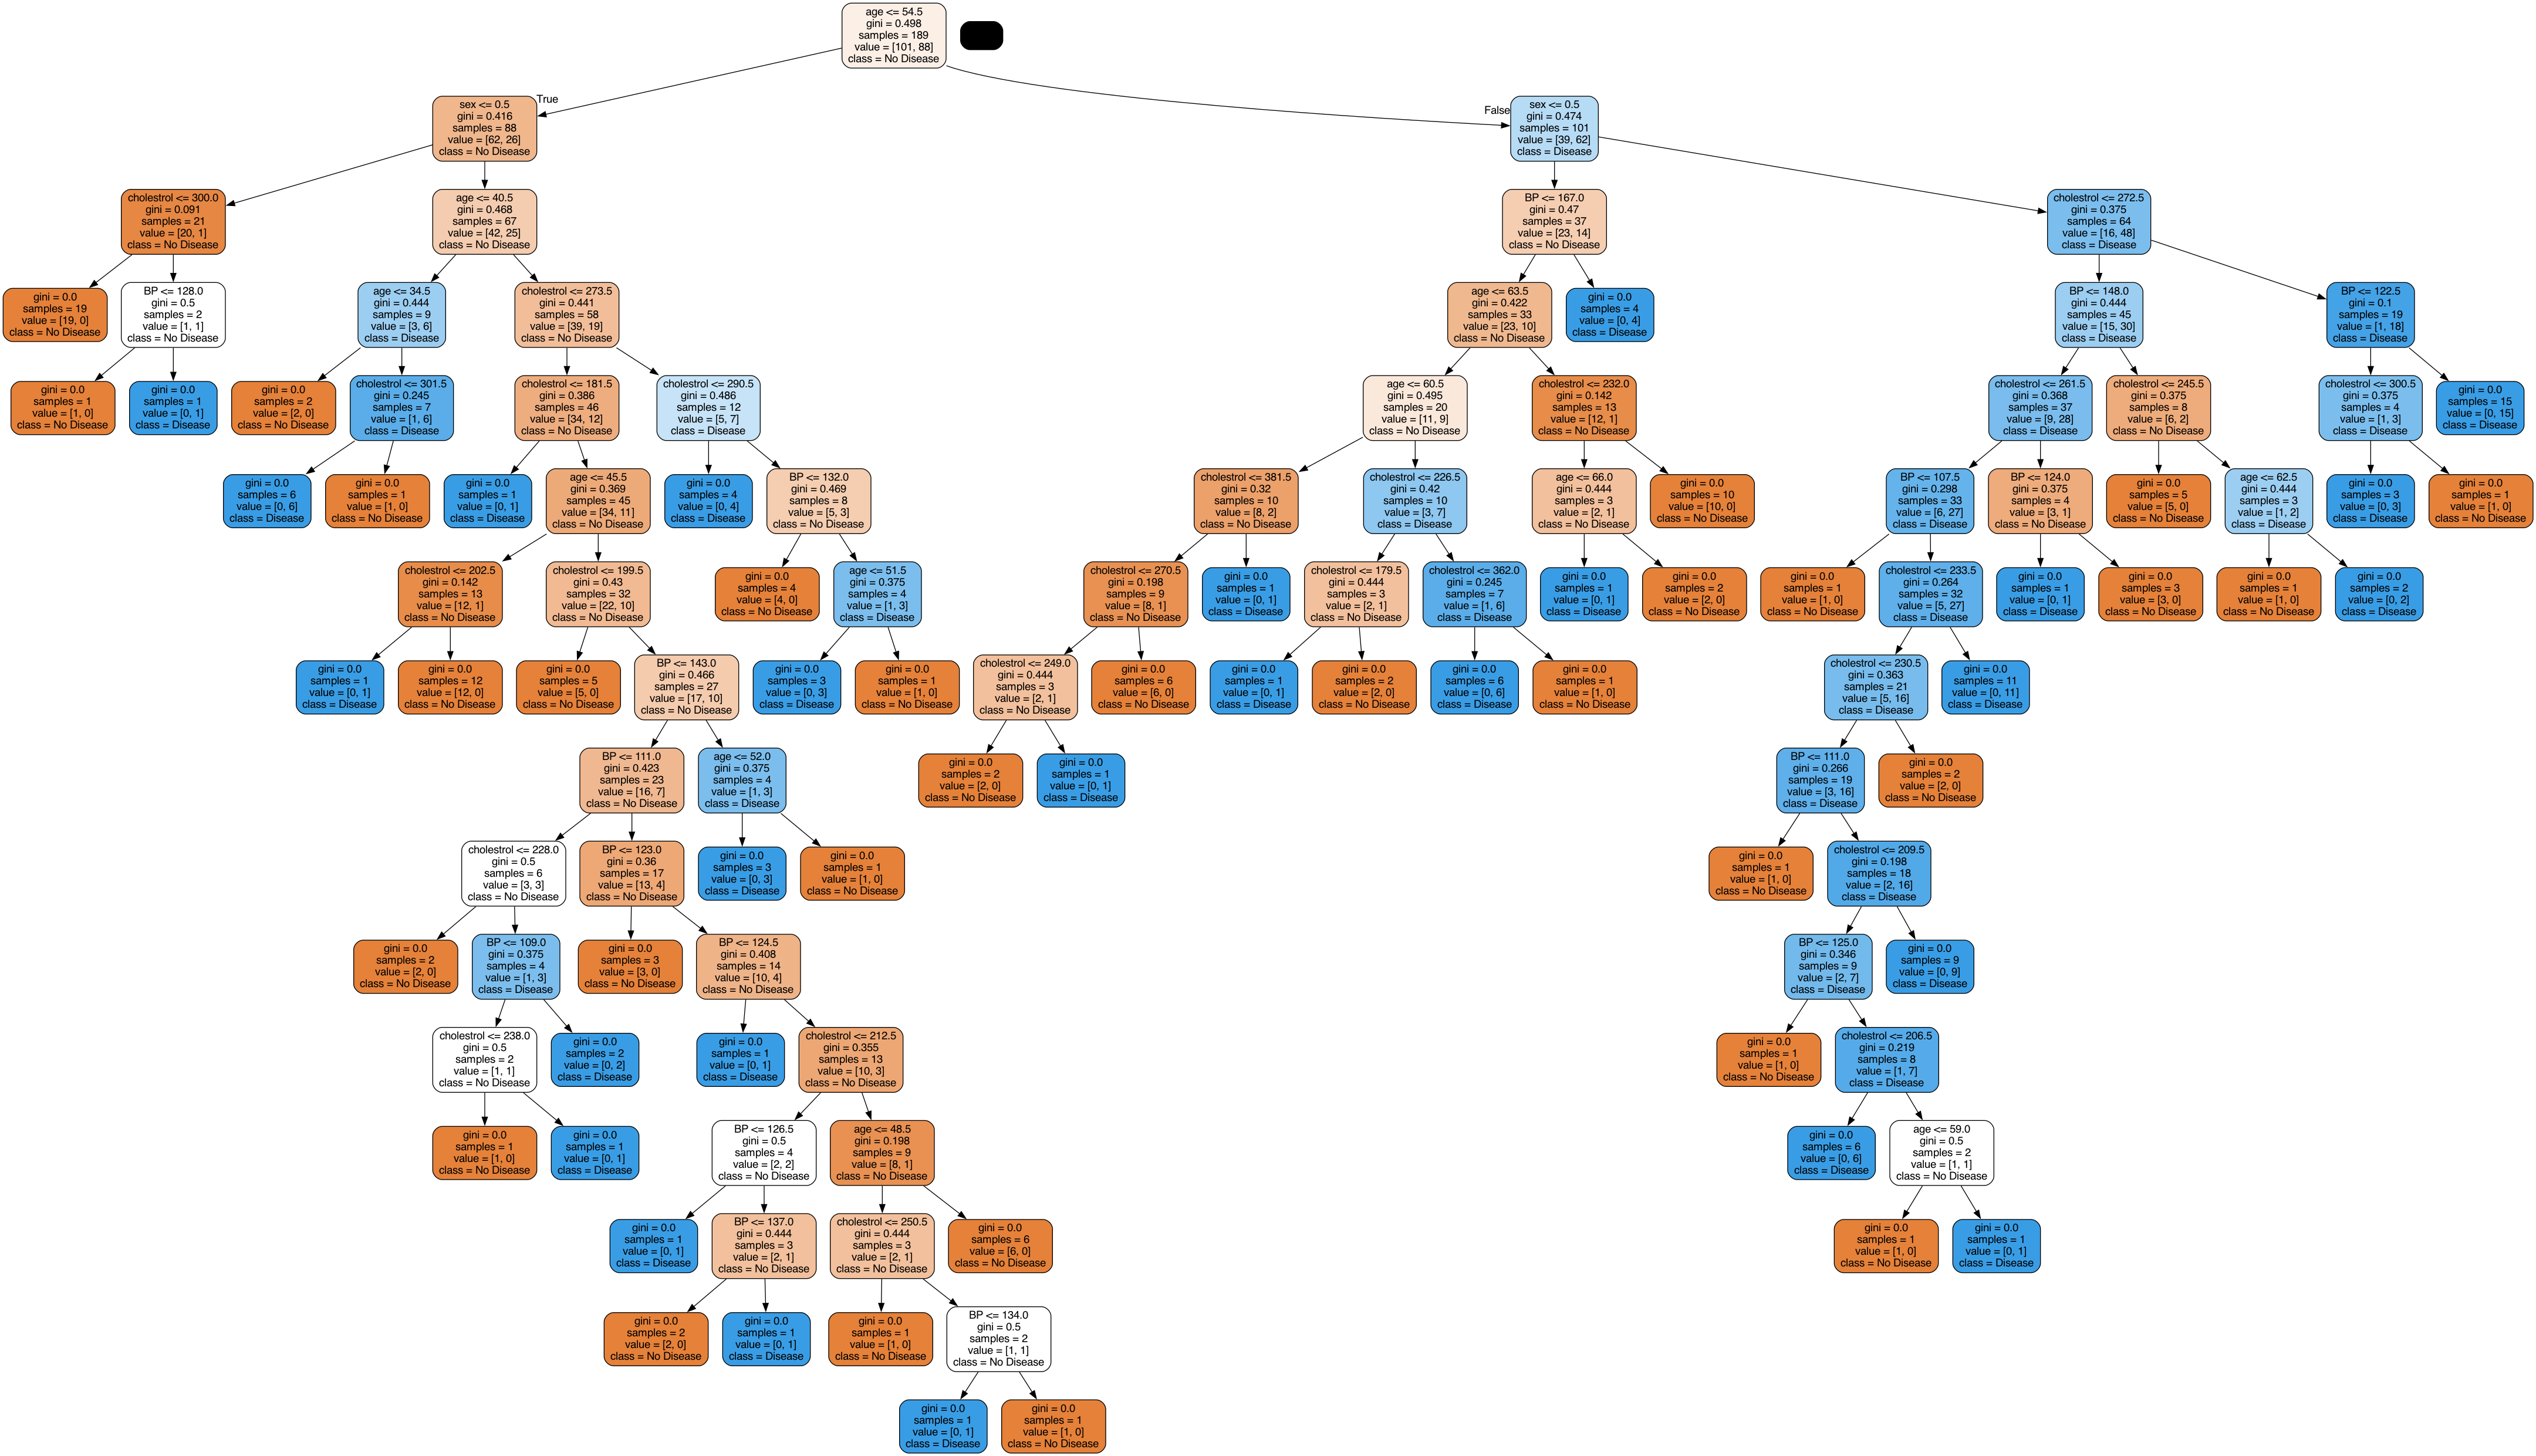

In [21]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [22]:
evaluate_model(dt_default)

Train set performance
Accuracy:  1.0
Confusion matrix: 
 [[101   0]
 [  0  88]]
----------------------------------------------------------------------------------------------------
Test set performance
Accuracy:  0.6296296296296297
Confusion matrix: 
 [[31 18]
 [12 20]]


### Controlling the depth of the tree

In [23]:
dt_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

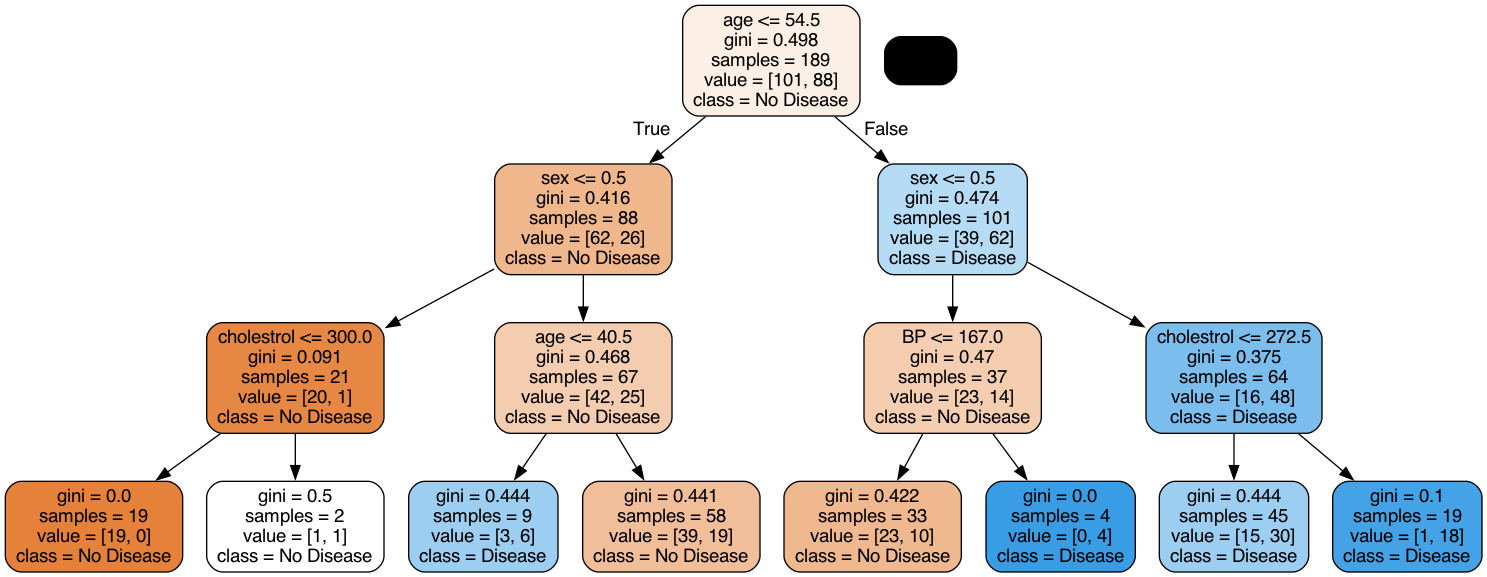

In [24]:
gph = get_dt_graph(dt_depth)
Image(gph.create_png())

In [25]:
evaluate_model(dt_depth)

Train set performance
Accuracy:  0.7407407407407407
Confusion matrix: 
 [[82 19]
 [30 58]]
----------------------------------------------------------------------------------------------------
Test set performance
Accuracy:  0.6049382716049383
Confusion matrix: 
 [[35 14]
 [18 14]]


### Specifying the minumum nodes before split

In [26]:
dt_split = DecisionTreeClassifier(min_samples_split=20, random_state=42)
dt_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

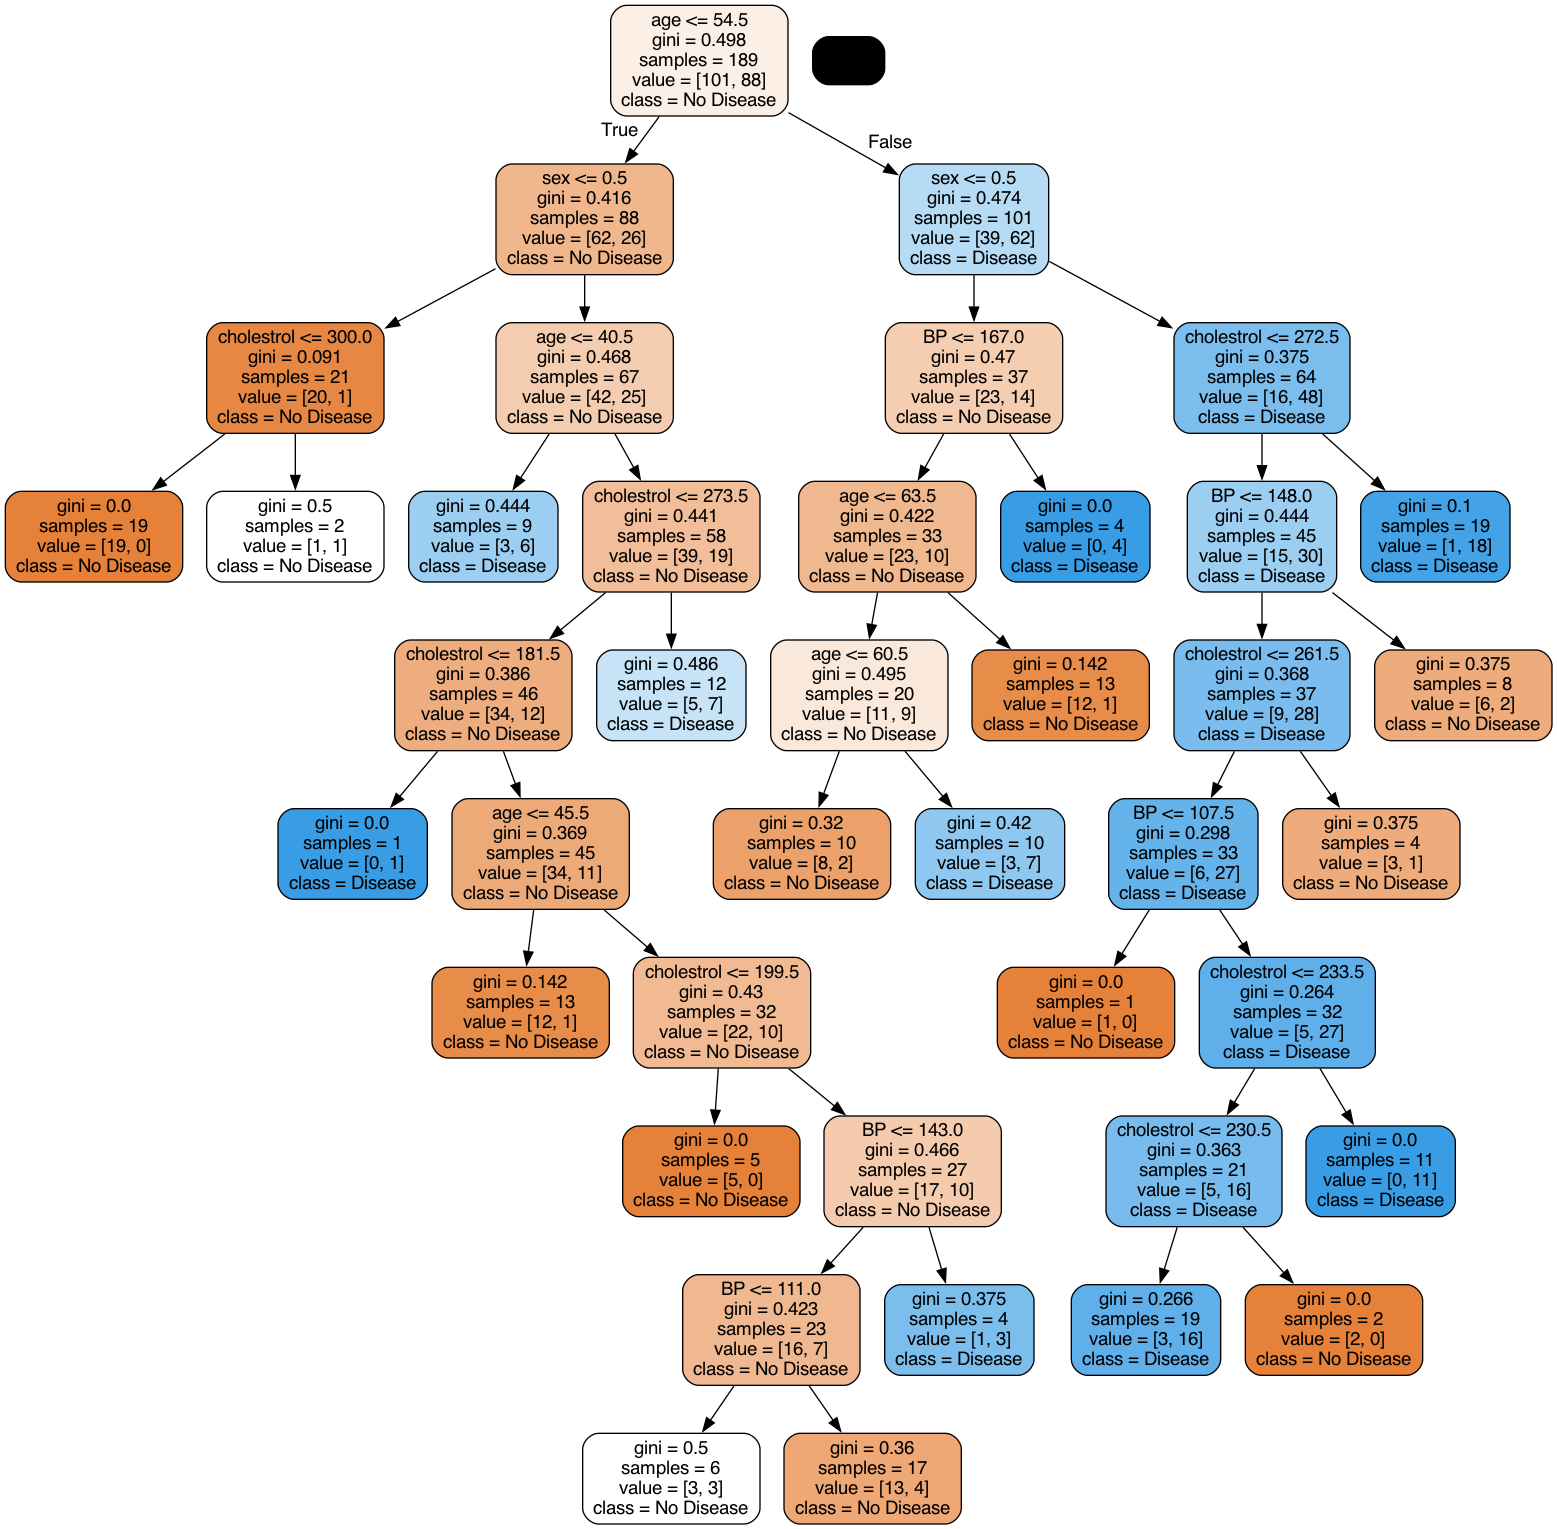

In [27]:
gph = get_dt_graph(dt_split)
Image(gph.create_png())

In [28]:
evaluate_model(dt_split)

Train set performance
Accuracy:  0.8359788359788359
Confusion matrix: 
 [[85 16]
 [15 73]]
----------------------------------------------------------------------------------------------------
Test set performance
Accuracy:  0.6419753086419753
Confusion matrix: 
 [[32 17]
 [12 20]]


### Specifying minimum samples in leaf node

In [29]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

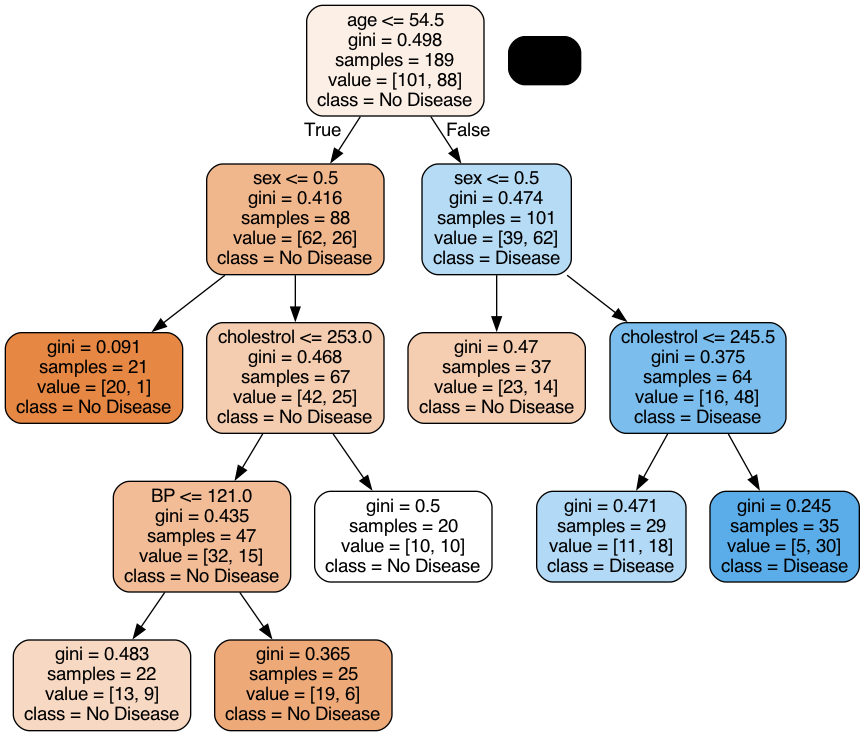

In [30]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [31]:
evaluate_model(dt_min_leaf)

Train set performance
Accuracy:  0.7037037037037037
Confusion matrix: 
 [[85 16]
 [40 48]]
----------------------------------------------------------------------------------------------------
Test set performance
Accuracy:  0.6419753086419753
Confusion matrix: 
 [[38 11]
 [18 14]]


#### Use 'entropy' instead of gini

In [32]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion='entropy')
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

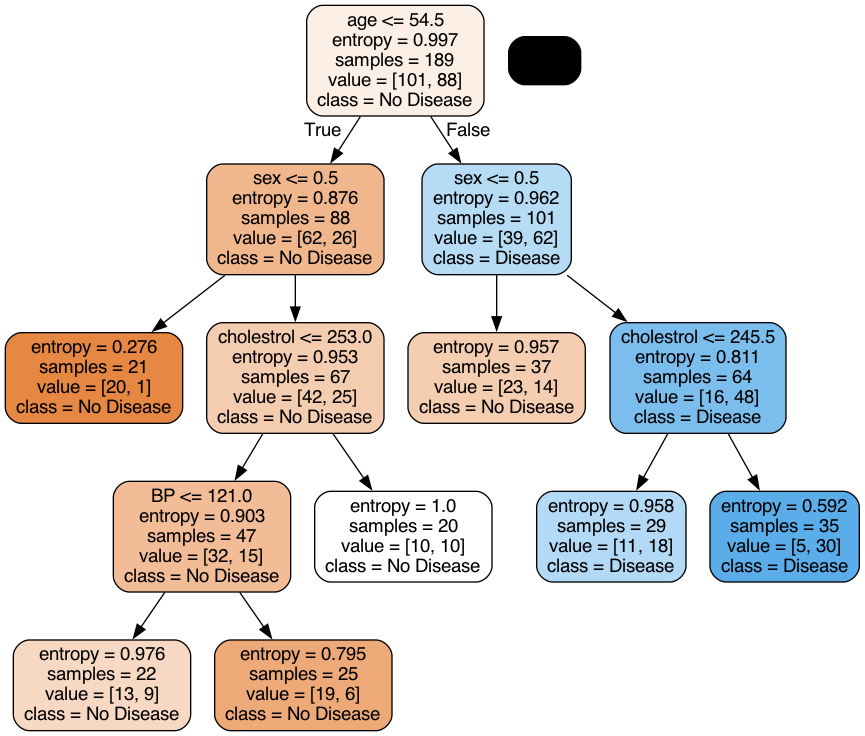

In [33]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [34]:
evaluate_model(dt_min_leaf_entropy)

Train set performance
Accuracy:  0.7037037037037037
Confusion matrix: 
 [[85 16]
 [40 48]]
----------------------------------------------------------------------------------------------------
Test set performance
Accuracy:  0.6419753086419753
Confusion matrix: 
 [[38 11]
 [18 14]]


### Hyper parameter tuining using GridSearchCV

In [46]:
dt_best = DecisionTreeClassifier(random_state=42)

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [49]:
grid_search = GridSearchCV(estimator=dt,
             param_grid=params,
             cv=4,
             n_jobs=-1, verbose=1, scoring='accuracy')

In [50]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 319 ms, sys: 127 ms, total: 446 ms
Wall time: 2.06 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [51]:
score_df = pd.DataFrame(grid_search.cv_results_) 
score_df.head() #display the result of 50 models build using grid search cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003231,0.000768,0.002143,0.000186,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,16
1,0.004051,0.001090,0.002848,0.000684,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,16
2,0.003047,0.000028,0.002165,0.000027,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,19
3,0.002945,0.000096,0.002105,0.000030,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.002821,0.000173,0.001985,0.000080,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [52]:
score_df.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.002918,0.000083,0.002099,0.000037,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
5,0.002814,0.000160,0.001912,0.000026,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,2
3,0.002945,0.000096,0.002105,0.000030,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
8,0.002321,0.000144,0.001657,0.000091,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
13,0.002087,0.000042,0.001540,0.000012,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3


In [53]:
print (grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)


In [54]:
dt_best = grid_search.best_estimator_

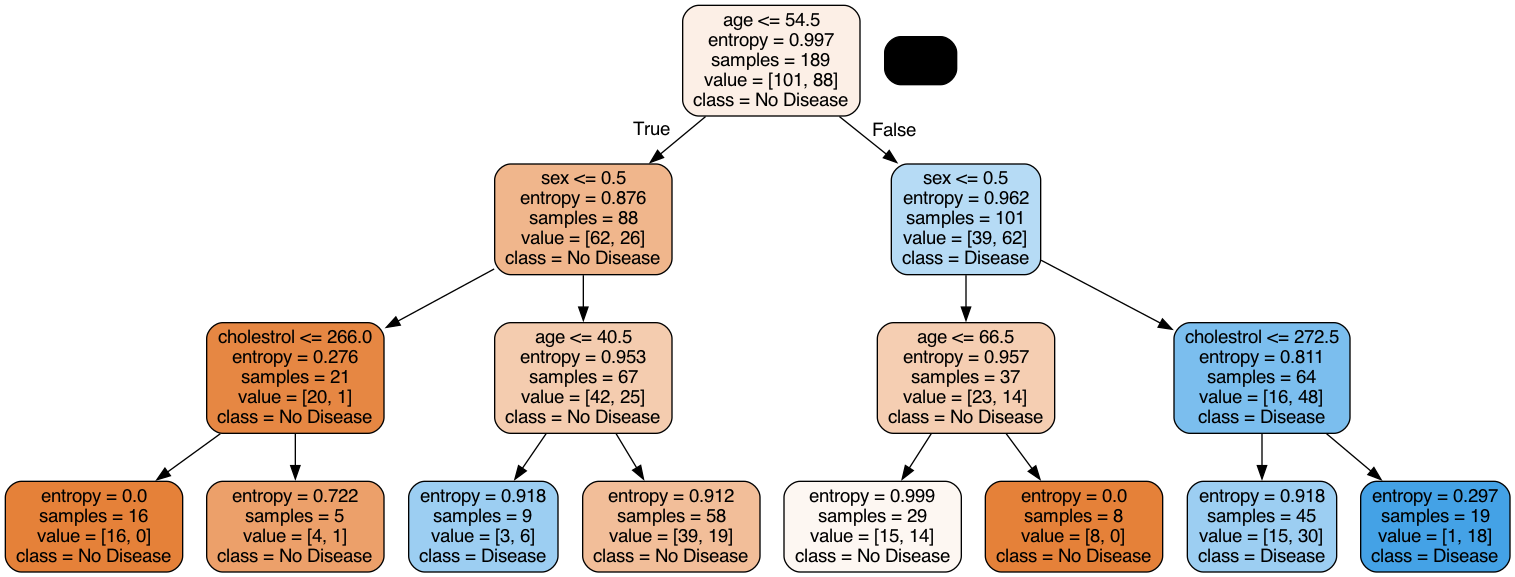

In [55]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

In [56]:
evaluate_model(dt_best)

Train set performance
Accuracy:  0.7195767195767195
Confusion matrix: 
 [[82 19]
 [34 54]]
----------------------------------------------------------------------------------------------------
Test set performance
Accuracy:  0.6172839506172839
Confusion matrix: 
 [[36 13]
 [18 14]]


In [57]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        49
           1       0.52      0.44      0.47        32

    accuracy                           0.62        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.61      0.62      0.61        81

